<a href="https://colab.research.google.com/github/nielseni6/ADV-EMRG-TPCS-IN-CI-ML-AND-DM/blob/master/Nielsen_attribution_FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**To run the code**:

---

##### **All necessary files can be found in the following drive folder**: https://drive.google.com/drive/folders/1Mx9cr0rWgnp9Q_P-pz7_NUoFJSgWeztL?usp=sharing

###### **Note**: scroll all the way to the bottom for instructions on how to create the DeepDream visualizations.

**1)** Download Integrated_Gradients.py and drag it into base directory in current runtime

`note: Integrated_Gradients.py is just a slightly edited version of *Axiomatic Attribution for Deep Networks* by Mukund Sundararajan, Ankur Taly, and Qiqi Yan. Github to original can be found` [here](https://github.com/ankurtaly/Integrated-Gradients).

**2)** Create folder called 'Models' and drag 'model_clean.dth' into it in current runtime. Now you should have `./Models/model_clean.dth` in current runtime. These are the weights for CIFAR10

**3)** Change imagepath to work with your own drive. You will want to navigate to `/ImageNet_DeepDreams/` once the folder is shared with you by clicking the link above the 1st step. Make sure to mount you drive first by running `drive.mount` below.

Original line that you need to change (in the 'Feature Visualization Attributions ImageNet' section):

`self.imagePath = './drive/MyDrive/Colab Notebooks/Nielsen Final Project AdvEmrgTpcs/ImageNet_DeepDreams/'`

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**4)** Run all. Change self.set_offset in order to change the input image batches.

In [5]:
!pip install captum
!pip install utils

     |████████████████████████████████| 5.7MB 4.6MB/s 


In [10]:
import numpy as np
classes = ('puppy','frog',' toad',' toad frog',' anuran',' batrachian',' salientian','green lizard',' Lacerta viridis','barn spider',' Araneus cavaticus','garden spider',' Aranea diademata','ptarmigan','echidna',' spiny anteater',' anteater','platypus',' duckbill',' duckbilled platypus',' duck-billed platypus',' Ornithorhynchus anatinus','bandicoot','kangaroo','pademelon',' paddymelon','phalanger',' opossum',' possum','cuscus','koala',' koala bear',' kangaroo bear',' native bear',' Phascolarctos cinereus','wombat','thylacine',' Tasmanian wolf',' Tasmanian tiger',' Thylacinus cynocephalus','numbat',' banded anteater',' anteater',' Myrmecobius fasciatus','livestock',' stock',' farm animal','cow','insectivore','bowhead',' bowhead whale',' Greenland whale',' Balaena mysticetus','rorqual',' razorback','porpoise','killer whale',' killer',' orca',' grampus',' sea wolf',' Orcinus orca','narwhal',' narwal',' narwhale',' Monodon monoceros','manatee',' Trichechus manatus','dugong',' Dugong dugon','carnivore','aardvark',' ant bear',' anteater',' Orycteropus afer','cur',' mongrel',' mutt','courser','hound',' hound dog','basset',' basset hound','beagle','bloodhound',' sleuthhound','bluetick','coonhound','dachshund',' dachsie',' badger dog','foxhound','redbone','wolfhound','greyhound','whippet','otterhound',' otter hound','Scottish deerhound',' deerhound','staghound','terrier','bullterrier',' bull terrier','wirehair',' wirehaired terrier',' wire-haired terrier','Australian terrier','schnauzer','retriever','vizsla',' Hungarian pointer','English setter','spaniel','clumber',' clumber spaniel','Sussex spaniel','kuvasz','schipperke','groenendael','malinois','briard','komondor','collie','pinscher','mastiff','bulldog',' English bulldog','Great Dane','Saint Bernard',' St Bernard','basenji','pug',' pug-dog','spitz','keeshond','corgi',' Welsh corgi','poodle',' poodle dog','dhole',' Cuon alpinus','aardwolf',' Proteles cristata','kit fox',' Vulpes macrotis','feline',' felid','mouser','tabby',' tabby cat','Persian cat','Egyptian cat','cougar',' puma',' catamount',' mountain lion',' painter',' panther',' Felis concolor','jaguarundi',' jaguarundi cat',' jaguarondi',' eyra',' Felis yagouaroundi','serval',' Felis serval','margay',' margay cat',' Felis wiedi','manul',' Pallass cat',' Felis manul','jaguar',' panther',' Panthera onca',' Felis onca','lion',' king of beasts',' Panthera leo','liger','tiglon',' tigon','cheetah',' chetah',' Acinonyx jubatus','bear','grizzly',' grizzly bear',' silvertip',' silver-tip',' Ursus horribilis',' Ursus arctos horribilis','binturong',' bearcat',' Arctictis bintourong','fanaloka',' Fossa fossa','bat',' chiropteran','serotine',' European brown bat',' Eptesicus serotinus','pipistrelle',' pipistrel',' Pipistrellus pipistrellus','freetail',' free-tailed bat',' freetailed bat','silverfish',' Lepisma saccharina','rabbit',' coney',' cony','hare','rodent',' gnawer','mouse','rat','hamster','gerbil',' gerbille','lemming','jerboa','dormouse','squirrel','chickeree',' Douglas squirrel',' Tamiasciurus douglasi','marmot','groundhog',' woodchuck',' Marmota monax','cavy','agouti',' Dasyprocta aguti','coypu',' nutria',' Myocastor coypus','viscacha',' chinchillon',' Lagostomus maximus','abrocome',' chinchilla rat',' rat chinchilla','ungulate',' hoofed mammal','hyrax',' coney',' cony',' dassie',' das','horse',' Equus caballus','roan','stablemate',' stable companion','male horse','mare',' female horse','warhorse','pony','buckskin','dun','steeplechaser','workhorse','chestnut','palomino','pinto','mule','hinny','zebra','bovid','bovine','longhorn',' Texas longhorn','zebu','cattalo',' beefalo','bison','sheep','ewe','wether','longwool','merino',' merino sheep','argali',' argal',' Ovis ammon','urial',' Ovis vignei','aoudad',' arui',' audad',' Barbary sheep',' maned sheep',' Ammotragus lervia','goat',' caprine animal','antelope','blackbuck',' black buck',' Antilope cervicapra','gerenuk',' Litocranius walleri','addax',' Addax nasomaculatus','gnu',' wildebeest','dik-dik','hartebeest','sassaby',' topi',' Damaliscus lunatus','impala',' Aepyceros melampus','gazelle','kudu',' koodoo',' koudou','bushbuck',' guib',' Tragelaphus scriptus','nilgai',' nylghai',' nylghau',' blue bull',' Boselaphus tragocamelus','saiga',' Saiga tatarica','steenbok',' steinbok',' Raphicerus campestris','eland','kob',' Kobus kob','lechwe',' Kobus leche','waterbuck','puku',' Adenota vardoni','oryx',' pasang','gemsbok',' gemsbuck',' Oryx gazella','pronghorn',' prongbuck',' pronghorn antelope',' American antelope',' Antilocapra americana','deer',' cervid','hart',' stag','hind','sambar',' sambur',' Cervus unicolor','wapiti',' elk',' American elk',' Cervus elaphus canadensis','elk',' European elk',' moose',' Alces alces','caribou',' reindeer',' Greenland caribou',' Rangifer tarandus','muntjac',' barking deer','chevrotain',' mouse deer','giraffe',' camelopard',' Giraffa camelopardalis','weasel','stoat','mink','polecat',' fitch',' foulmart',' foumart',' Mustela putorius','black-footed ferret',' ferret',' Mustela nigripes','otter','skunk',' polecat',' wood pussy','badger','ratel',' honey badger',' Mellivora capensis','marten',' marten cat','tayra',' taira',' Eira barbara','pachyderm','pangolin',' scaly anteater',' anteater','simian','ape','hominid','orangutan',' orang',' orangutang',' Pongo pygmaeus','gorilla',' Gorilla gorilla','silverback','chimpanzee',' chimp',' Pan troglodytes','siamang',' Hylobates syndactylus',' Symphalangus syndactylus','monkey','guenon',' guenon monkey','grivet',' Cercopithecus aethiops','vervet',' vervet monkey',' Cercopithecus aethiops pygerythrus','patas',' hussar monkey',' Erythrocebus patas','baboon','chacma',' chacma baboon',' Papio ursinus','mandrill',' Mandrillus sphinx','macaque','langur','colobus',' colobus monkey','guereza',' Colobus guereza','tamarin',' lion monkey',' lion marmoset',' leoncita','prosimian','lemur','aye-aye',' Daubentonia madagascariensis','galago',' bushbaby',' bush baby','indri',' indris',' Indri indri',' Indri brevicaudatus','tarsier','raccoon',' racoon','bassarisk',' cacomistle',' cacomixle',' coon cat',' raccoon fox',' ringtail',' ring-tailed cat',' civet cat',' miners cat',' Bassariscus astutus','kinkajou',' honey bear',' potto',' Potos flavus',' Potos caudivolvulus','coati',' coati-mondi',' coati-mundi',' coon cat',' Nasua narica','lesser panda',' red panda',' panda',' bear cat',' cat bear',' Ailurus fulgens','coho',' cohoe',' coho salmon',' blue jack',' silver salmon',' Oncorhynchus kisutch','backboard',' basketball backboard','bag','ball','basket',' basketball hoop',' hoop','basketball','bathtub',' bathing tub',' bath',' tub','bench','blackboard',' chalkboard','bottle','box','bridge',' span','buckle','building',' edifice','button','cabinet','chair','comb','cross','cue',' cue stick',' pool cue',' pool stick','drawer','drum',' membranophone',' tympan','feather boa',' boa','Ferris wheel','filter','flag','fork','key','keyboard','lamp','mallet','marimba',' xylophone','police van',' police wagon',' paddy wagon',' patrol wagon',' wagon',' black Maria','pool table',' billiard table',' snooker table','pot','rack','roller coaster',' big dipper',' chute-the-chute','rule',' ruler','sail','sheet',' bed sheet','ski','sofa',' couch',' lounge','squash racket',' squash racquet',' bat','stick','table','toilet seat','towel','tower','transporter',' car transporter','wheel','window','vegetarianism','coloring',' colouring',' food coloring',' food colouring',' food color',' food colour','roughage',' fiber','adobo','casserole','goulash',' Hungarian goulash',' gulyas','ragout','pot-au-feu','slumgullion','flan','mousse','tiramisu','ice lolly',' lolly',' lollipop',' popsicle','parfait','pudding','zabaglione',' sabayon','samosa','saute','margarine',' margarin',' oleo',' oleomargarine',' marge','bannock','chapatti',' chapati','pita',' pocket bread','limpa','shortcake','strawberry','salad','catsup',' ketchup',' cetchup',' tomato ketchup','chutney',' Indian relish','salsa','curry','pesto','ravigote',' ravigotte','bordelaise','demiglace',' demi-glaze','gravy','veloute','egg yolk',' yolk','omelet',' omelette','souffle','bleu',' blue cheese','gorgonzola','mozzarella','ricotta','miso','hummus',' humus',' hommos',' hoummos',' humous','pate','honey','sugar',' refined sugar','syrup',' sirup','pasta','chili',' chili con carne','croquette','fondue',' fondu','jambalaya','kedgeree','macedoine','moussaka','pizza',' pizza pie','porridge','potpie','sauerkraut','succotash','sukiyaki','teriyaki','terrine','schnitzel',' Wiener schnitzel','burrito','tostada','vintage','champagne',' bubbly','retsina','vermouth','generic',' generic wine','varietal',' varietal wine','grappa','kirsch','slivovitz','absinth',' absinthe','anisette',' anisette de Bordeaux','kummel','maraschino','maraschinoliqueur','sambuca','bullshot','daiquiri','rumcocktail','martini','screwdriver','sidecar','lemonade','limeade','orangeade','souchong','soochong','hyson','ramekin','ramequin','grassland','plain','field','champaign','daisy','sunflower','helianthus','grass','acorn','bonsai','puppy','frog',' toad',' toad frog',' anuran',' batrachian',' salientian','green lizard',' Lacerta viridis','barn spider',' Araneus cavaticus','garden spider',' Aranea diademata','ptarmigan','echidna',' spiny anteater',' anteater','platypus',' duckbill',' duckbilled platypus',' duck-billed platypus',' Ornithorhynchus anatinus','bandicoot','kangaroo','pademelon',' paddymelon','phalanger',' opossum',' possum','cuscus','koala',' koala bear',' kangaroo bear',' native bear',' Phascolarctos cinereus','wombat','thylacine',' Tasmanian wolf',' Tasmanian tiger',' Thylacinus cynocephalus','numbat',' banded anteater',' anteater',' Myrmecobius fasciatus','livestock',' stock',' farm animal','cow','insectivore','bowhead',' bowhead whale',' Greenland whale',' Balaena mysticetus','rorqual',' razorback','porpoise','killer whale',' killer',' orca',' grampus',' sea wolf',' Orcinus orca','narwhal',' narwal',' narwhale',' Monodon monoceros','puppy','frog',' toad',' toad frog',' anuran',' batrachian',' salientian','green lizard',' Lacerta viridis','barn spider',' Araneus cavaticus','garden spider',' Aranea diademata','ptarmigan','echidna',' spiny anteater',' anteater','platypus',' duckbill',' duckbilled platypus',' duck-billed platypus',' Ornithorhynchus anatinus','bandicoot','kangaroo','pademelon',' paddymelon','phalanger',' opossum',' possum','cuscus','koala',' koala bear',' kangaroo bear',' native bear',' Phascolarctos cinereus','wombat','thylacine',' Tasmanian wolf',' Tasmanian tiger',' Thylacinus cynocephalus','numbat',' banded anteater',' anteater',' Myrmecobius fasciatus','livestock',' stock',' farm animal','cow','insectivore','bowhead',' bowhead whale',' Greenland whale',' Balaena mysticetus','rorqual',' razorback','porpoise','killer whale',' killer',' orca',' grampus',' sea wolf',' Orcinus orca','narwhal',' narwal',' narwhale',' Monodon monoceros','manatee',' Trichechus manatus','dugong',' Dugong dugon','carnivore','aardvark',' ant bear',' anteater',' Orycteropus afer','cur',' mongrel',' mutt','courser','hound',' hound dog','basset',' basset hound','beagle','bloodhound',' sleuthhound','bluetick','coonhound','dachshund',' dachsie',' badger dog','foxhound','redbone','wolfhound','greyhound','whippet','otterhound',' otter hound','Scottish deerhound',' deerhound','staghound','terrier','bullterrier',' bull terrier','wirehair',' wirehaired terrier',' wire-haired terrier','Australian terrier','schnauzer','retriever','vizsla',' Hungarian pointer','English setter','spaniel','clumber',' clumber spaniel','Sussex spaniel','kuvasz','schipperke','groenendael','malinois','briard','komondor','collie','pinscher','mastiff','bulldog',' English bulldog','Great Dane','Saint Bernard',' St Bernard','basenji','pug',' pug-dog','spitz','keeshond','corgi',' Welsh corgi','poodle',' poodle dog','dhole',' Cuon alpinus','aardwolf',' Proteles cristata','kit fox',' Vulpes macrotis','feline',' felid','mouser','tabby',' tabby cat','Persian cat','Egyptian cat','cougar',' puma',' catamount',' mountain lion',' painter',' panther',' Felis concolor','jaguarundi',' jaguarundi cat',' jaguarondi',' eyra',' Felis yagouaroundi','serval',' Felis serval','margay',' margay cat',' Felis wiedi','manul',' Pallass cat',' Felis manul','jaguar',' panther',' Panthera onca',' Felis onca','lion',' king of beasts',' Panthera leo','liger','tiglon',' tigon','cheetah',' chetah',' Acinonyx jubatus','bear','grizzly',' grizzly bear',' silvertip',' silver-tip',' Ursus horribilis',' Ursus arctos horribilis','binturong',' bearcat',' Arctictis bintourong','fanaloka',' Fossa fossa','bat',' chiropteran','serotine',' European brown bat',' Eptesicus serotinus','pipistrelle',' pipistrel',' Pipistrellus pipistrellus','freetail',' free-tailed bat',' freetailed bat','silverfish',' Lepisma saccharina','rabbit',' coney',' cony','hare','rodent',' gnawer','mouse','rat','hamster','gerbil',' gerbille','lemming','jerboa','dormouse','squirrel','chickeree',' Douglas squirrel',' Tamiasciurus douglasi','marmot','groundhog',' woodchuck',' Marmota monax','cavy','agouti',' Dasyprocta aguti','coypu',' nutria',' Myocastor coypus','viscacha',' chinchillon',' Lagostomus maximus','abrocome',' chinchilla rat',' rat chinchilla','ungulate',' hoofed mammal','hyrax',' coney',' cony',' dassie',' das','horse',' Equus caballus','roan','stablemate',' stable companion','male horse','mare',' female horse','warhorse','pony','buckskin','dun','steeplechaser','workhorse','chestnut','palomino','pinto','mule','hinny','zebra','bovid','bovine','longhorn',' Texas longhorn','zebu','cattalo',' beefalo','bison','sheep','ewe','wether','longwool','merino',' merino sheep','argali',' argal',' Ovis ammon','urial',' Ovis vignei','aoudad',' arui',' audad',' Barbary sheep',' maned sheep',' Ammotragus lervia','goat',' caprine animal','antelope','blackbuck',' black buck',' Antilope cervicapra','gerenuk',' Litocranius walleri','addax',' Addax nasomaculatus','gnu',' wildebeest','dik-dik','hartebeest','sassaby',' topi',' Damaliscus lunatus','impala',' Aepyceros melampus','gazelle','kudu',' koodoo',' koudou','bushbuck',' guib',' Tragelaphus scriptus','nilgai',' nylghai',' nylghau',' blue bull',' Boselaphus tragocamelus','saiga',' Saiga tatarica','steenbok',' steinbok',' Raphicerus campestris','eland','kob',' Kobus kob','lechwe',' Kobus leche','waterbuck','puku',' Adenota vardoni','oryx',' pasang','gemsbok',' gemsbuck',' Oryx gazella','pronghorn',' prongbuck',' pronghorn antelope',' American antelope',' Antilocapra americana','deer',' cervid','hart',' stag','hind','sambar',' sambur',' Cervus unicolor','wapiti',' elk',' American elk',' Cervus elaphus canadensis','elk',' European elk',' moose',' Alces alces','caribou',' reindeer',' Greenland caribou',' Rangifer tarandus','muntjac',' barking deer','chevrotain',' mouse deer','giraffe',' camelopard',' Giraffa camelopardalis','weasel','stoat','mink','polecat',' fitch',' foulmart',' foumart',' Mustela putorius','black-footed ferret',' ferret',' Mustela nigripes','otter','skunk',' polecat',' wood pussy','badger','ratel',' honey badger',' Mellivora capensis','marten',' marten cat','tayra',' taira',' Eira barbara','pachyderm','pangolin',' scaly anteater',' anteater','simian','ape','hominid','orangutan',' orang',' orangutang',' Pongo pygmaeus','gorilla',' Gorilla gorilla','silverback','chimpanzee',' chimp',' Pan troglodytes','siamang',' Hylobates syndactylus',' Symphalangus syndactylus','monkey','guenon',' guenon monkey','grivet',' Cercopithecus aethiops','vervet',' vervet monkey',' Cercopithecus aethiops pygerythrus','patas',' hussar monkey',' Erythrocebus patas','baboon','chacma',' chacma baboon',' Papio ursinus','mandrill',' Mandrillus sphinx','macaque','langur','colobus',' colobus monkey','guereza',' Colobus guereza','tamarin',' lion monkey',' lion marmoset',' leoncita','prosimian','lemur','aye-aye',' Daubentonia madagascariensis','galago',' bushbaby',' bush baby','indri',' indris',' Indri indri',' Indri brevicaudatus','tarsier','raccoon',' racoon','bassarisk',' cacomistle',' cacomixle',' coon cat',' raccoon fox',' ringtail',' ring-tailed cat',' civet cat',' miners cat',' Bassariscus astutus','kinkajou',' honey bear',' potto',' Potos flavus',' Potos caudivolvulus','coati',' coati-mondi',' coati-mundi',' coon cat',' Nasua narica','lesser panda',' red panda',' panda',' bear cat',' cat bear',' Ailurus fulgens','coho',' cohoe',' coho salmon',' blue jack',' silver salmon',' Oncorhynchus kisutch','backboard',' basketball backboard','bag','ball','basket',' basketball hoop',' hoop','basketball','bathtub',' bathing tub',' bath',' tub','bench','blackboard',' chalkboard','bottle','box','bridge',' span','buckle','building',' edifice','button','cabinet','chair','comb','cross','cue',' cue stick',' pool cue',' pool stick','drawer','drum',' membranophone',' tympan','feather boa',' boa','Ferris wheel','filter','flag','fork','key','keyboard','lamp','mallet','marimba',' xylophone','police van',' police wagon',' paddy wagon',' patrol wagon',' wagon',' black Maria','pool table',' billiard table',' snooker table','pot','rack','roller coaster',' big dipper',' chute-the-chute','rule',' ruler','sail','sheet',' bed sheet','ski','sofa',' couch',' lounge','squash racket',' squash racquet',' bat','stick','table','toilet seat','towel','tower','transporter',' car transporter','wheel','window','vegetarianism','coloring',' colouring',' food coloring',' food colouring',' food color',' food colour','roughage',' fiber','adobo','casserole','goulash',' Hungarian goulash',' gulyas','ragout','pot-au-feu','slumgullion','flan','mousse','tiramisu','ice lolly',' lolly',' lollipop',' popsicle','parfait','pudding','zabaglione',' sabayon','samosa','saute','margarine',' margarin',' oleo',' oleomargarine',' marge','bannock','chapatti',' chapati','pita',' pocket bread','limpa','shortcake','strawberry','salad','catsup',' ketchup',' cetchup',' tomato ketchup','chutney',' Indian relish','salsa','curry','pesto','ravigote',' ravigotte','bordelaise','demiglace',' demi-glaze','gravy','veloute','egg yolk',' yolk','omelet',' omelette','souffle','bleu',' blue cheese','gorgonzola','mozzarella','ricotta','miso','hummus',' humus',' hommos',' hoummos',' humous','pate','honey','sugar',' refined sugar','syrup',' sirup','pasta','chili',' chili con carne','croquette','fondue',' fondu','jambalaya','kedgeree','macedoine','moussaka','pizza',' pizza pie','porridge','potpie','sauerkraut','succotash','sukiyaki','teriyaki','terrine','schnitzel',' Wiener schnitzel','burrito','tostada','vintage','champagne',' bubbly','retsina','vermouth','generic',' generic wine','varietal',' varietal wine','grappa','kirsch','slivovitz','absinth',' absinthe','anisette',' anisette de Bordeaux','kummel','maraschino','maraschinoliqueur','sambuca','bullshot','daiquiri','rumcocktail','martini','screwdriver','sidecar','lemonade','limeade','orangeade','souchong','soochong','hyson','ramekin','ramequin','grassland','plain','field','champaign','daisy','sunflower','helianthus','grass','acorn','bonsai','puppy','frog',' toad',' toad frog',' anuran',' batrachian',' salientian','green lizard',' Lacerta viridis','barn spider',' Araneus cavaticus','garden spider',' Aranea diademata','ptarmigan','echidna',' spiny anteater',' anteater','platypus',' duckbill',' duckbilled platypus',' duck-billed platypus',' Ornithorhynchus anatinus','bandicoot','kangaroo','pademelon',' paddymelon','phalanger',' opossum',' possum','cuscus','koala',' koala bear',' kangaroo bear',' native bear',' Phascolarctos cinereus','wombat','thylacine',' Tasmanian wolf',' Tasmanian tiger',' Thylacinus cynocephalus','numbat',' banded anteater',' anteater',' Myrmecobius fasciatus','livestock',' stock',' farm animal','cow','insectivore','bowhead',' bowhead whale',' Greenland whale',' Balaena mysticetus','rorqual',' razorback','porpoise','killer whale',' killer',' orca',' grampus',' sea wolf',' Orcinus orca','narwhal',' narwal',' narwhale',' Monodon monoceros')
classes = np.array(classes)
# Below are all classes which were used for figures
classes[436] = 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon'
classes[751] = 'racer, race car, racing car'
classes[282] = 'tiger cat'
classes[256] = 'Newfoundland, Newfoundland dog'
classes[248] = 'Eskimo dog, husky'
classes[235] = 'German shepherd, German shepherd dog, German police dog, alsatian'
classes[895] = 'warplane, military plane'

**Feature Visualization Attributions ImageNet**


---



Testing dataset size:  10
[array(675), array(864), array(864), array(864), array(468), array(864), array(731), array(509), array(731), array(902)]
Calculating saliency maps for sample  1


/usr/local/lib/python3.6/dist-packages/captum/_utils/gradient.py:55: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.6/dist-packages/captum/attr/_core/guided_backprop_deconvnet.py:61: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  "Setting backward hooks on ReLU activations."


Calculating saliency maps for sample  2
Calculating saliency maps for sample  3
Calculating saliency maps for sample  4
Calculating saliency maps for sample  5
Calculating saliency maps for sample  6
Calculating saliency maps for sample  7
Calculating saliency maps for sample  8
Calculating saliency maps for sample  9
Calculating saliency maps for sample  10


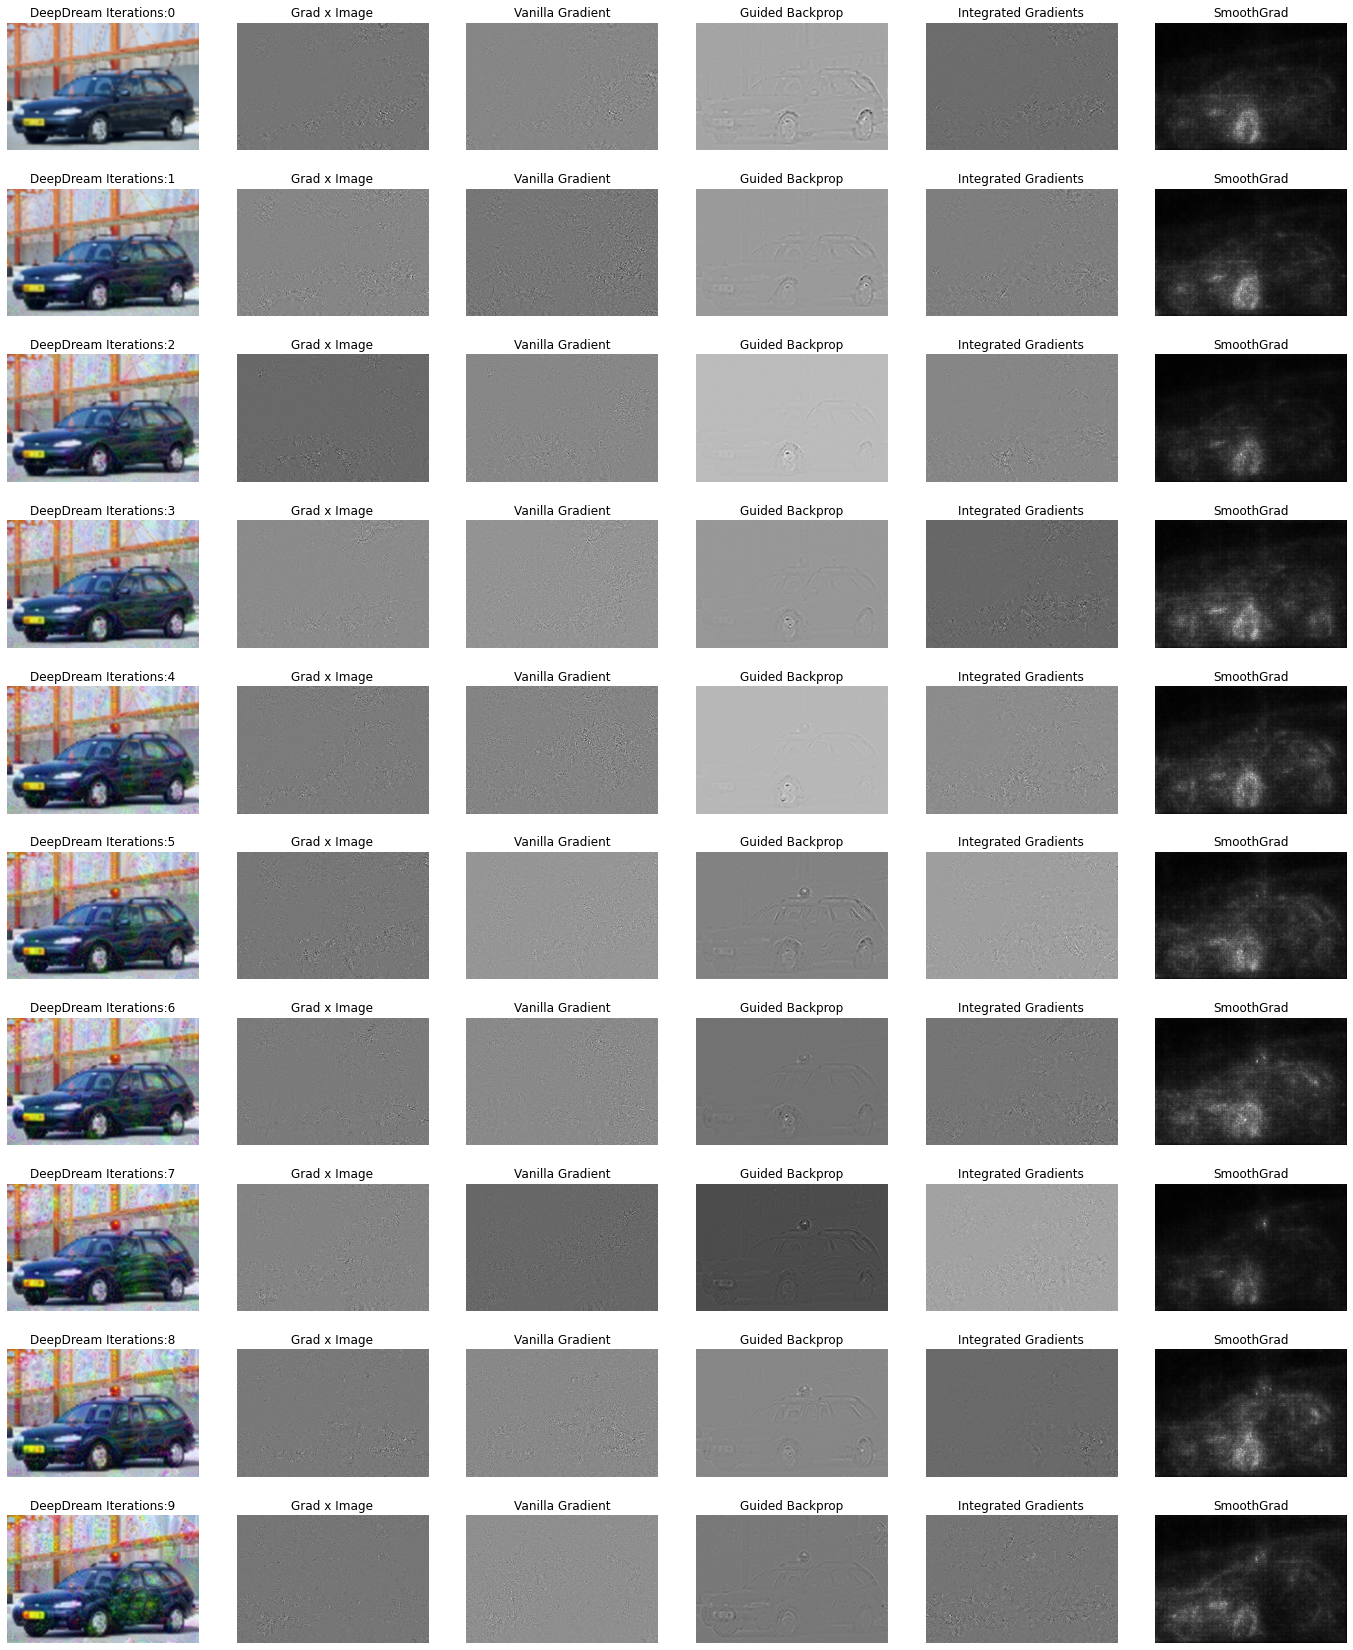

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib
#matplotlib.use("Agg")

import matplotlib.pyplot as plt
import time
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
# Download Integrated_Gradients.py and drag it into base directory in current runtime
from Integrated_Gradients import integrated_gradients
# import SmoothGrad as sg 
%matplotlib inline
from captum.attr import (
    InputXGradient,
    Saliency,
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    GuidedGradCam,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
    GuidedBackprop,
)

def attribute_image_features(algorithm, input, **kwargs):
    model_ft.zero_grad()
    tensor_attributions = algorithm.attribute(input,
                                              target=int(class_pred),
                                              **kwargs
                                             )
    return tensor_attributions

def imshow(img):
    img = img     # unnormalize
    npimg = img.detach().numpy()
    tpimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(tpimg)
#    plt.show()
    plt.savefig("imshowfig.png")
    
def VisualizeImageGrayscale(image_3d):
  r"""Returns a 3D tensor as a grayscale normalized between 0 and 1 2D tensor.
  """
  vmin = torch.min(image_3d)
  image_2d = image_3d - vmin
  vmax = torch.max(image_2d)
  return (image_2d / vmax)

    
class Args():
    def __init__(self):
        # Change imagepath to work with your own drive
        self.imagePath = './drive/MyDrive/Colab Notebooks/Nielsen Final Project AdvEmrgTpcs/ImageNet_DeepDreams/'
        # Must create folder called 'Models' and drag 'model_clean.dth' into it in current runtime
        self.loadModel = './Models/model_clean.dth'
#        self.loadModel = ''
        self.data_set = 0 # data_set = 0: ImageNet, data_set = 1: CIFAR10
        self.class_pred = 436 # 436 = 'station wagon'; 751 = 'race car'; 282 = 'tiger cat'; 256 = 'Newfoundland dog';
                              # 248 = 'Eskimo dog, husky'; 235 = 'German shepherd'; 895 = 'warplane, military plane'
        self.cuda = True
        self.epochs     = 30
        self.batch_size = 1
        self.lr         = 0.001
        self.num_labels = 10
        self.nsamples = 10    # Set size should always be the same as nsamples
        self.gray_maps = True
        self.squared_maps = False 
        self.baseline = torch.tensor(np.float32(0.0*np.random.rand(1, 3, 224, 224)))
        self.set_size = 10    # Set size should always be the same as nsamples
        self.set_offset = 0  # Offset determines which images are chosen (0 = cars; 10 = cats; 20 = dogs; 30 = planes )

if __name__ == '__main__':
    args = Args()
    lr = args.lr
    class_pred = args.class_pred
    cuda = args.cuda
    epochs = args.epochs
    imagePath = args.imagePath
    model_path = args.loadModel
    data_set = args.data_set
    batch_size = args.batch_size
    num_labels = args.num_labels
    nsamples = args.nsamples
    gray_maps = args.gray_maps
    squared_maps = args.squared_maps
    baseline = args.baseline
    set_size = args.set_size
    set_offset = args.set_offset
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if (data_set):
        classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        #Load Resnet18
        model_ft = models.resnet18(pretrained=True)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, len(classes))
    else:
        #Load Resnet50
        model_ft = models.resnet50(pretrained=True)

    model_ft = model_ft.to(device)
    
    #Loss Function
    criterion = nn.CrossEntropyLoss()
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

    transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    cifar_testset = datasets.ImageFolder(root=imagePath, 
                               transform=transform_test
                               )
    
    cifar_testset = torch.utils.data.Subset(cifar_testset, range(set_offset, set_size+set_offset, 1))
                                                            
    test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=1, shuffle=False)
    
    print("Testing dataset size: ", len(cifar_testset))
    
    if (data_set):
        model_ft.load_state_dict(torch.load(model_path))
    model_ft.eval()

    gbp = GuidedBackprop(model_ft)
    sa = Saliency(model_ft)
    dl = DeepLift(model_ft)
    gxi = InputXGradient(model_ft)
    i_g = IntegratedGradients(model_ft)
    
    nt = NoiseTunnel(sa)

    #Test
    result_images, predicted_out = list(), list()
    for itr, (image, label) in enumerate(test_dataloader):
    
        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()
        
        image.requires_grad_(True)
        pred = model_ft(image)
        
        loss = criterion(pred, label)
        loss.backward()
        
        for i, p in enumerate(pred):
            predicted_out.append(torch.max(p.data, 0)[1].detach().cpu().numpy())
            result_images.append(image)
    
    print(predicted_out)
    
    attribution_names = [
                      "Grad x Image", 
                      "Vanilla Gradient", 
                      "Guided Backprop", 
                      "Integrated Gradients", 
                      "SmoothGrad", 
                      ]
    attribution_maps = list()
    for x in range(len(attribution_names)):
        attribution_maps.append(list())
    
    for itr in range(nsamples):
        print("Calculating saliency maps for sample ", int(itr + 1))
        data = result_images[itr].clone().detach()
        
        grad_x_image = attribute_image_features(gxi, data)
        
        vanilla_grad = attribute_image_features(sa, data, abs = squared_maps)
        
        gbp_attributions = gbp.attribute(data, target=int(class_pred))
        gbp_attributions = gbp_attributions.cpu()
        
        integrated_grad = attribute_image_features(i_g, data, n_steps=50)
        
        smoothgrad = nt.attribute(data, nt_type='smoothgrad', n_samples=15, target=int(class_pred))
        # smoothgrad = sg.GetSmoothedMask(data.cpu(), nsamples=15, magnitude=squared_maps)
        
        if squared_maps:
            grad_x_image = grad_x_image * grad_x_image
            gbp_attributions = gbp_attributions * gbp_attributions
            integrated_grad = integrated_grad * integrated_grad
            smoothgrad = smoothgrad * smoothgrad
        
        attribution_maps[0].append(grad_x_image.clone().detach())
        attribution_maps[1].append(vanilla_grad.clone().detach())
        attribution_maps[2].append(gbp_attributions.clone().detach())
        attribution_maps[3].append(integrated_grad.clone().detach())
        attribution_maps[4].append(smoothgrad.clone().detach())
    
    fig=plt.figure(figsize=(24, 30))
    length, width = nsamples, (len(attribution_maps) + 1)
    

    for i in range((len(result_images))):
        
        #fig.add_subplot(length, width, (i * width) + 1).set_title(str("pred:" + str(classes[int(class_pred)])))
        fig.add_subplot(length, width, (i * width) + 1).set_title(str("DeepDream Iterations:"+str(i)))
        imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(result_images[i][0].clone().detach().cpu())))
        plt.axis('off')

        for j in range(len(attribution_maps)):
            
            attribution_map = attribution_maps[j][i].clone().detach().cpu()
            
            if gray_maps:
                attribution_map = attribution_map[0][0] + attribution_map[0][1] + attribution_map[0][2]
            
            fig.add_subplot(length, width, (i * width) + j + 2).set_title(attribution_names[j])
            imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(attribution_map)))
            plt.axis('off')
    
    plt.show()
    plt.savefig("saliency_FV_ImageNet.png")
    


**Feature Visualization Attributions CIFAR10**


---



Testing dataset size:  10
[array(6), array(9), array(9), array(4), array(1), array(5), array(9), array(1), array(2), array(1)]
Calculating saliency maps for sample  1
Calculating saliency maps for sample  2


/usr/local/lib/python3.6/dist-packages/captum/_utils/gradient.py:55: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.6/dist-packages/captum/attr/_core/guided_backprop_deconvnet.py:61: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  "Setting backward hooks on ReLU activations."


Calculating saliency maps for sample  3
Calculating saliency maps for sample  4
Calculating saliency maps for sample  5
Calculating saliency maps for sample  6
Calculating saliency maps for sample  7
Calculating saliency maps for sample  8
Calculating saliency maps for sample  9
Calculating saliency maps for sample  10


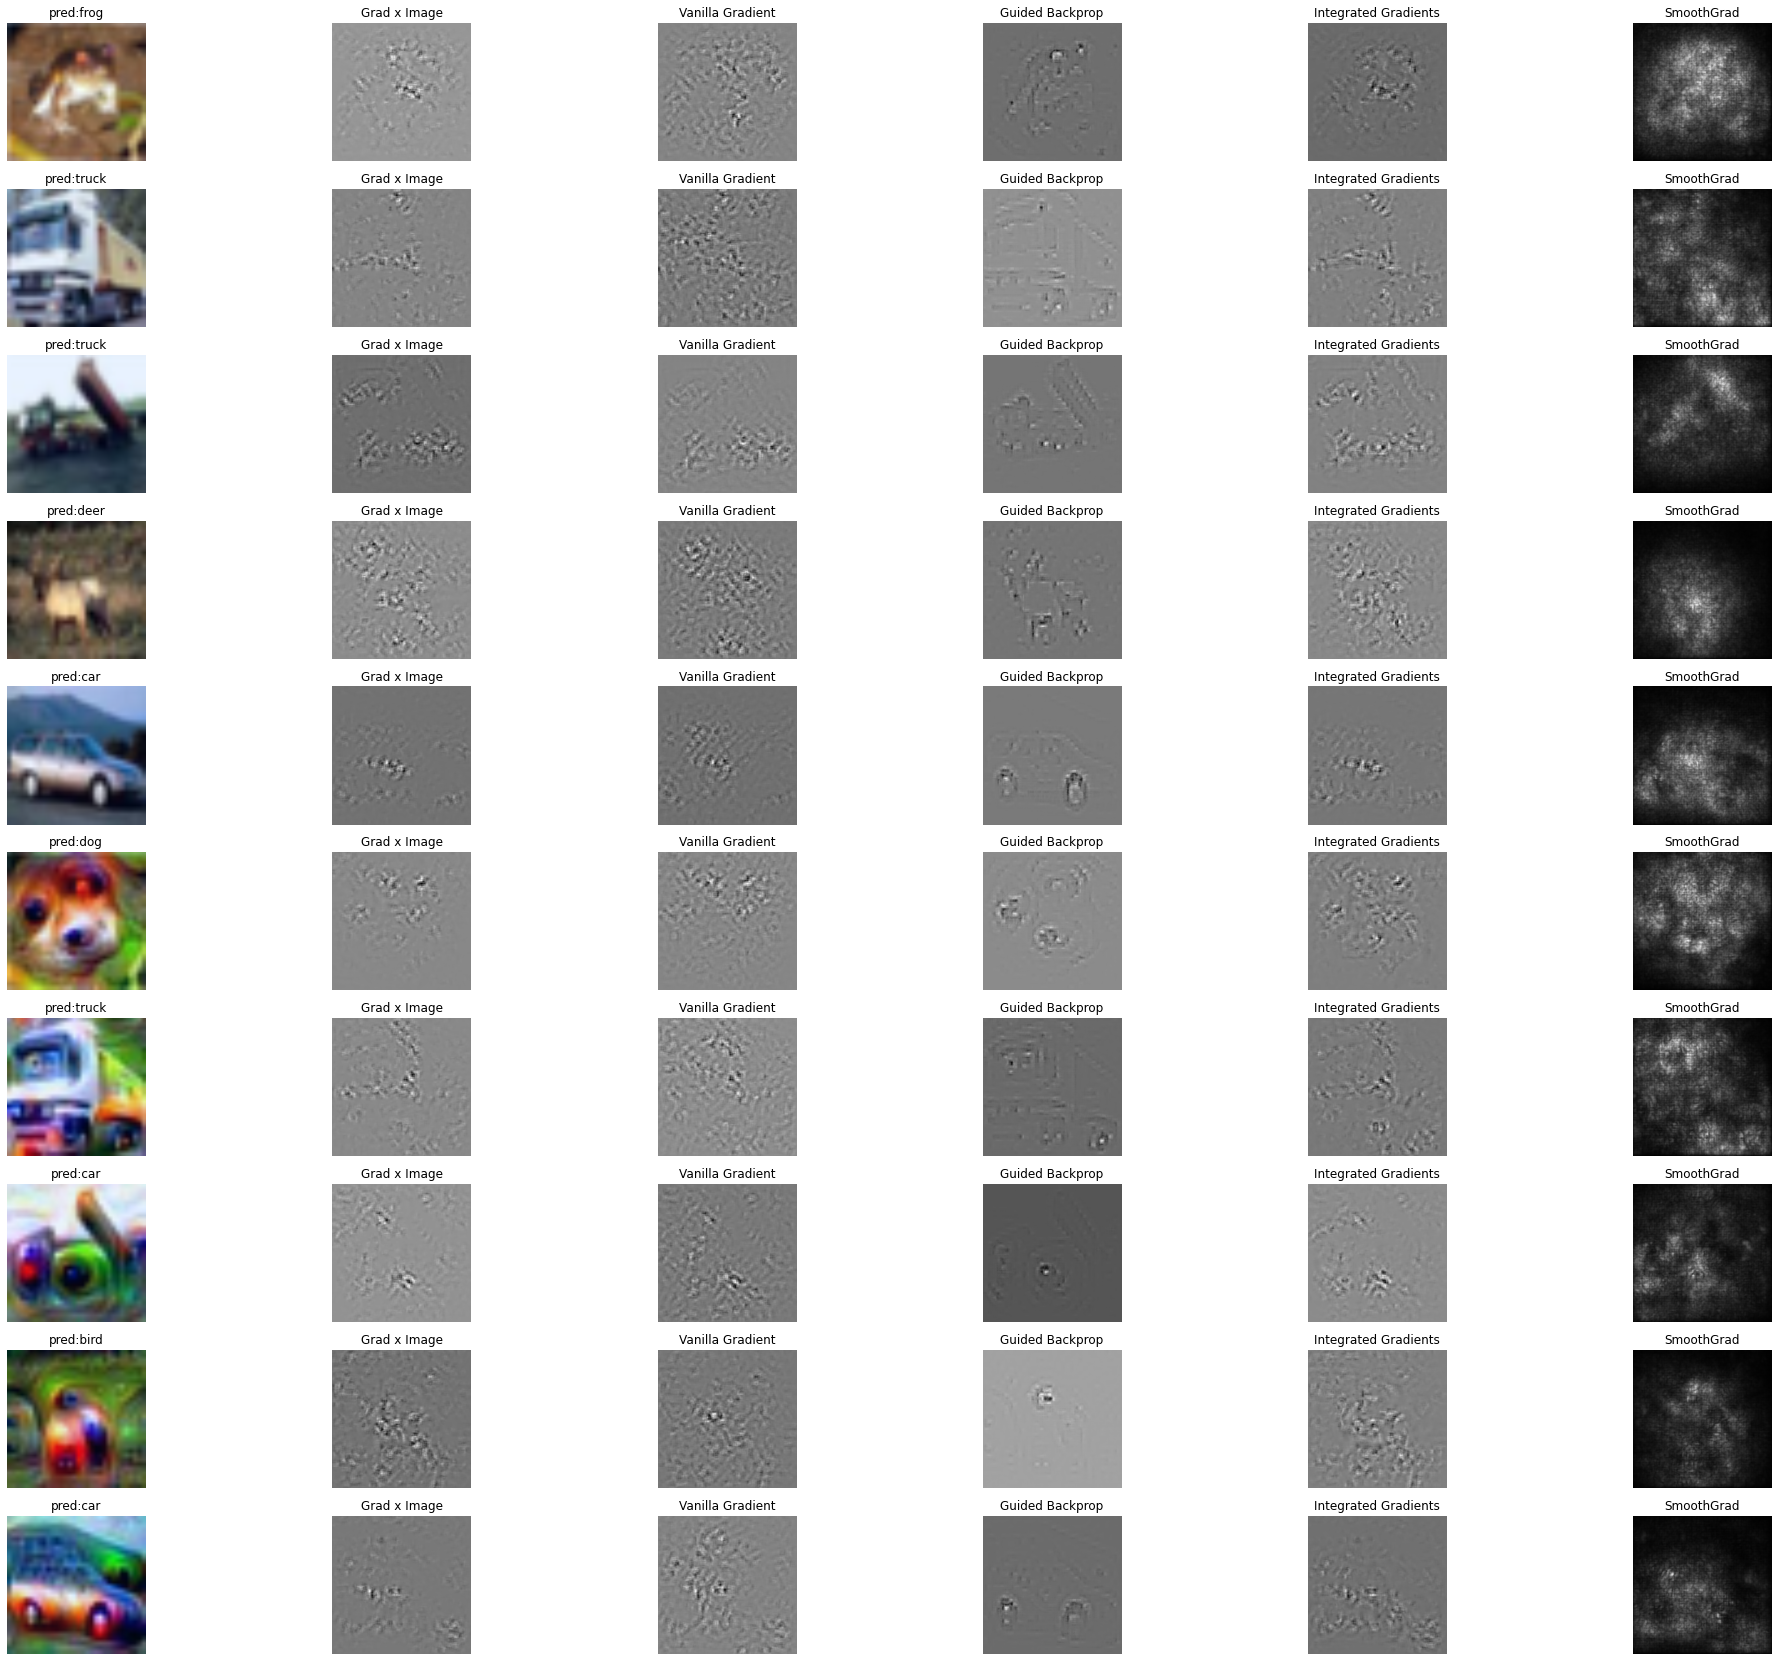

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib
#matplotlib.use("Agg")

import matplotlib.pyplot as plt
import time
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from Integrated_Gradients import integrated_gradients
# import SmoothGrad as sg
%matplotlib inline
from captum.attr import (
    InputXGradient,
    Saliency,
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    GuidedGradCam,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
    GuidedBackprop,
)

def attribute_image_features(algorithm, input, **kwargs):
    model_ft.zero_grad()
    tensor_attributions = algorithm.attribute(input,
                                              target=int(predicted_out[itr]),
                                              **kwargs
                                             )
    return tensor_attributions

def imshow(img):
    img = img     # unnormalize
    npimg = img.detach().numpy()
    tpimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(tpimg)
#    plt.show()
    plt.savefig("imshowfig.png")
    
def VisualizeImageGrayscale(image_3d):
  r"""Returns a 3D tensor as a grayscale normalized between 0 and 1 2D tensor.
  """
  vmin = torch.min(image_3d)
  image_2d = image_3d - vmin
  vmax = torch.max(image_2d)
  return (image_2d / vmax)
    
class Args():
    def __init__(self):
        # Change imagepath to work with your own drive
        self.imagePath = './drive/MyDrive/Colab Notebooks/Nielsen Final Project AdvEmrgTpcs/CIFAR10_Inputs/'
        # Must create folder called 'Models' and drag 'model_clean.dth' into it in current runtime (only required for CIFAR10)
        self.loadModel = './Models/model_clean.dth'
        self.data_set = 1             # data_set = 0: ImageNet, data_set = 1: CIFAR10
        self.cuda = True
        self.epochs     = 30
        self.batch_size = 1
        self.lr         = 0.001
        self.nsamples = 10            # Set size should always be the same as nsamples
        self.gray_maps = True
        self.squared_maps = False
        self.baseline = torch.tensor(np.float32(0.0*np.random.rand(1, 3, 224, 224)))
        self.set_size = 10            # Set size should always be the same as nsamples
        self.set_offset = 0           # No offset, only 10 images in folder
        
if __name__ == '__main__':
    args = Args()
    lr = args.lr
    cuda = args.cuda
    epochs = args.epochs
    imagePath = args.imagePath
    model_path = args.loadModel
    data_set = args.data_set
    batch_size = args.batch_size
    nsamples = args.nsamples
    gray_maps = args.gray_maps
    squared_maps = args.squared_maps
    baseline = args.baseline
    set_size = args.set_size
    set_offset = args.set_offset
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if (data_set):
        classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        #Load Resnet18
        model_ft = models.resnet18(pretrained=True)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, len(classes))
    else:
        #Load Resnet50
        model_ft = models.resnet50(pretrained=True)

    model_ft = model_ft.to(device)
    
    #Loss Function
    criterion = nn.CrossEntropyLoss()
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

    transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    cifar_testset = datasets.ImageFolder(root=imagePath, 
                               transform=transform_test
                               )
    
    cifar_testset = torch.utils.data.Subset(cifar_testset, range(set_offset, set_size+set_offset, 1))
                                                            
    test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=1, shuffle=False)
    
    print("Testing dataset size: ", len(cifar_testset))
    
    if (data_set):
        model_ft.load_state_dict(torch.load(model_path))
    model_ft.eval()

    gbp = GuidedBackprop(model_ft)
    sa = Saliency(model_ft)
    dl = DeepLift(model_ft)
    gxi = InputXGradient(model_ft)
    i_g = IntegratedGradients(model_ft)
    
    nt = NoiseTunnel(sa)

    #Test
    result_images, predicted_out = list(), list()
    for itr, (image, label) in enumerate(test_dataloader):
    
        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()
        
        image.requires_grad_(True)
        pred = model_ft(image)
        
        loss = criterion(pred, label)
        loss.backward()
        
        for i, p in enumerate(pred):
            predicted_out.append(torch.max(p.data, 0)[1].detach().cpu().numpy())
            result_images.append(image)
    
    print(predicted_out)
    
    attribution_names = [
                      "Grad x Image", 
                      "Vanilla Gradient", 
                      "Guided Backprop", 
                      "Integrated Gradients", 
                      "SmoothGrad", 
                      ]
    attribution_maps = list()
    for x in range(len(attribution_names)):
        attribution_maps.append(list())
    
    for itr in range(nsamples):
        print("Calculating saliency maps for sample ", int(itr + 1))
        data = result_images[itr].clone().detach()
        
        grad_x_image = attribute_image_features(gxi, data)
        
        vanilla_grad = attribute_image_features(sa, data, abs = squared_maps)
        
        gbp_attributions = gbp.attribute(data, target=int(predicted_out[itr]))
        gbp_attributions = gbp_attributions.cpu()
        
        integrated_grad = attribute_image_features(i_g, data, n_steps=50)
        
        smoothgrad = nt.attribute(data, nt_type='smoothgrad', n_samples=15, target=int(predicted_out[itr]))
        # smoothgrad = sg.GetSmoothedMask(data.cpu(), nsamples=15, magnitude=squared_maps)
        
        if squared_maps:
            grad_x_image = grad_x_image * grad_x_image
            gbp_attributions = gbp_attributions * gbp_attributions
            integrated_grad = integrated_grad * integrated_grad
            smoothgrad = smoothgrad * smoothgrad
        
        attribution_maps[0].append(grad_x_image.clone().detach())
        attribution_maps[1].append(vanilla_grad.clone().detach())
        attribution_maps[2].append(gbp_attributions.clone().detach())
        attribution_maps[3].append(integrated_grad.clone().detach())
        attribution_maps[4].append(smoothgrad.clone().detach())
    
    fig=plt.figure(figsize=(34, 30))
    length, width = nsamples, (len(attribution_maps) + 1)
    

    for i in range((len(result_images))):
        
        fig.add_subplot(length, width, (i * width) + 1).set_title(str("pred:" + str(classes[int(predicted_out[i])])))
        imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(result_images[i][0].clone().detach().cpu())))
        plt.axis('off')

        for j in range(len(attribution_maps)):
            
            attribution_map = attribution_maps[j][i].clone().detach().cpu()
            
            if gray_maps:
                attribution_map = attribution_map[0][0] + attribution_map[0][1] + attribution_map[0][2]
            
            fig.add_subplot(length, width, (i * width) + j + 2).set_title(attribution_names[j])
            imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(attribution_map)))
            plt.axis('off')
    
    plt.show()
    plt.savefig("saliency_individuals_ImageNet.png")
    

**Saliency Maps on Baseline ImageNet Images**


---




Testing dataset size:  5
[array(436), array(436), array(436), array(751), array(751)]
Calculating saliency maps for sample  1


/usr/local/lib/python3.6/dist-packages/captum/_utils/gradient.py:55: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.6/dist-packages/captum/attr/_core/guided_backprop_deconvnet.py:61: UserWarning: Setting backward hooks on ReLU activations.The hooks will be removed after the attribution is finished
  "Setting backward hooks on ReLU activations."


Calculating saliency maps for sample  2
Calculating saliency maps for sample  3
Calculating saliency maps for sample  4
Calculating saliency maps for sample  5


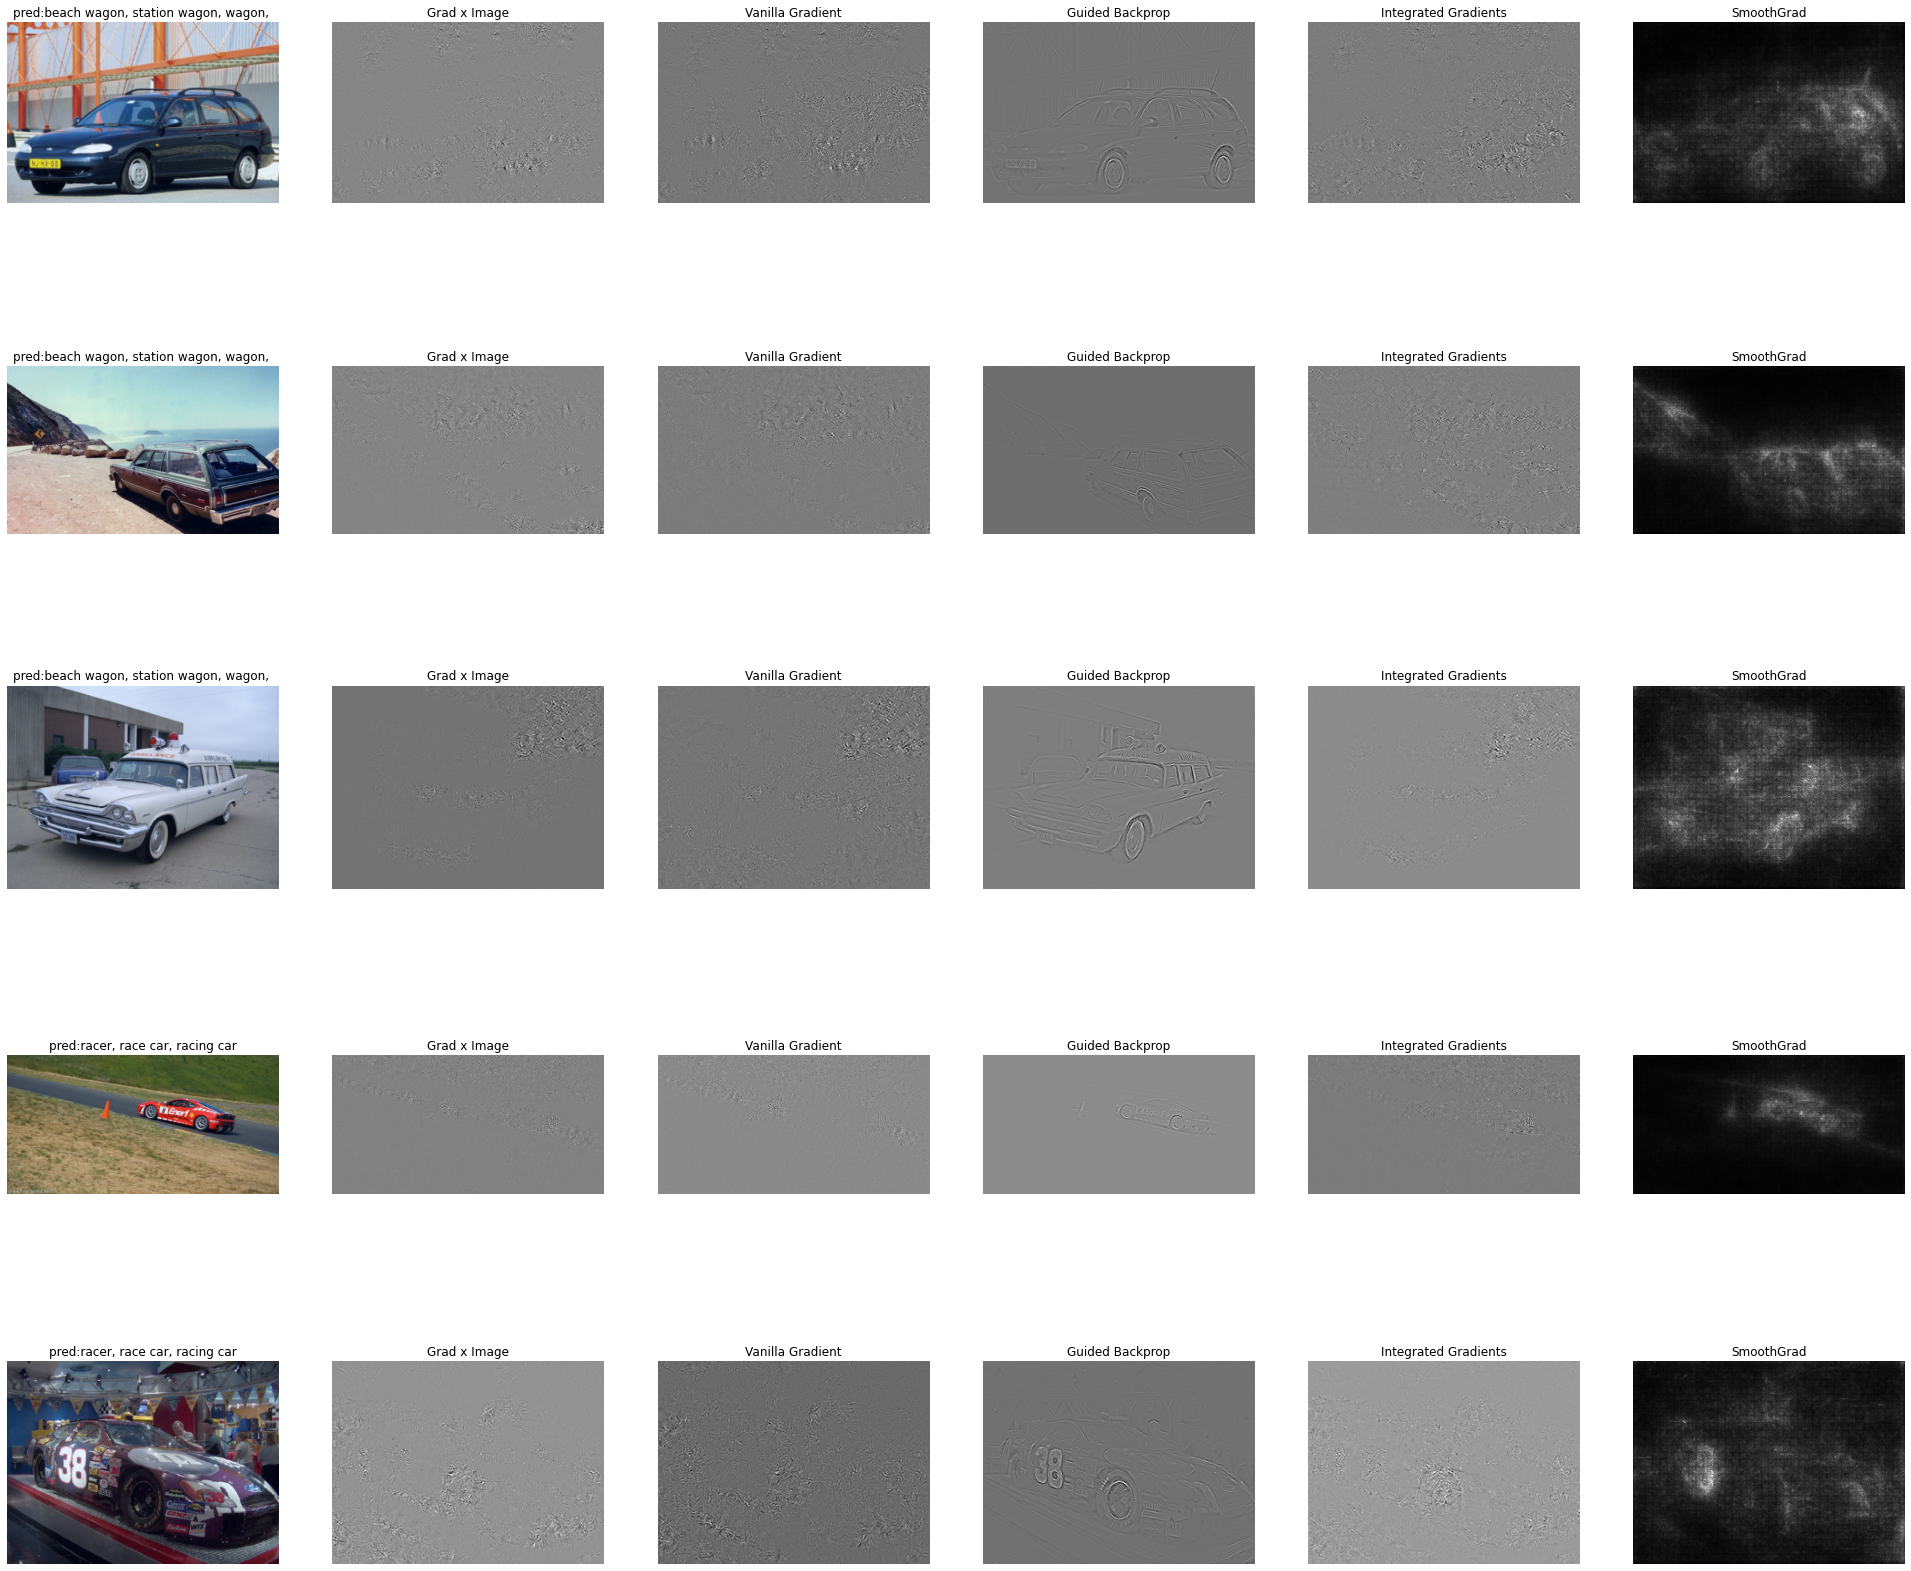

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib
#matplotlib.use("Agg")

import matplotlib.pyplot as plt
import time
import torch, os
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np
from Integrated_Gradients import integrated_gradients
# import SmoothGrad as sg
%matplotlib inline
from captum.attr import (
    InputXGradient,
    Saliency,
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    GuidedGradCam,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
    GuidedBackprop,
)

def attribute_image_features(algorithm, input, **kwargs):
    model_ft.zero_grad()
    tensor_attributions = algorithm.attribute(input,
                                              target=int(predicted_out[itr]),
                                              **kwargs
                                             )
    return tensor_attributions

def imshow(img):
    img = img     # unnormalize
    npimg = img.detach().numpy()
    tpimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(tpimg)
#    plt.show()
    plt.savefig("imshowfig.png")
    
def VisualizeImageGrayscale(image_3d):
  r"""Returns a 3D tensor as a grayscale normalized between 0 and 1 2D tensor.
  """
  vmin = torch.min(image_3d)
  image_2d = image_3d - vmin
  vmax = torch.max(image_2d)
  return (image_2d / vmax)
    
class Args():
    def __init__(self):
        # Change imagepath to work with your own drive
        self.imagePath = './drive/MyDrive/Colab Notebooks/Nielsen Final Project AdvEmrgTpcs/ImageNet_Inputs/'
        # Must create folder called 'Models' and drag 'model_clean.dth' into it in current runtime (only required for CIFAR10)
        self.loadModel = './Models/model_clean.dth'
        self.data_set = 0 # data_set = 0: ImageNet, data_set = 1: CIFAR10
        self.cuda = True
        self.epochs     = 30
        self.batch_size = 1
        self.lr         = 0.001
        self.nsamples = 5           # Set size should always be 5, since there are 5 of each set of images
        self.gray_maps = True
        self.squared_maps = False
        self.baseline = torch.tensor(np.float32(0.0*np.random.rand(1, 3, 224, 224)))
        self.set_size = 5           # Set size should always be 5, since there are 5 of each set of images
        self.set_offset = 0         #Offset determines which images are chosen (0 = cars; 5 = cats; 10 = dogs; 15 = planes )
        
if __name__ == '__main__':
    args = Args()
    lr = args.lr
    cuda = args.cuda
    epochs = args.epochs
    imagePath = args.imagePath
    model_path = args.loadModel
    data_set = args.data_set
    batch_size = args.batch_size
    nsamples = args.nsamples
    gray_maps = args.gray_maps
    squared_maps = args.squared_maps
    baseline = args.baseline
    set_size = args.set_size
    set_offset = args.set_offset
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    if (data_set):
        classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
        #Load Resnet18
        model_ft = models.resnet18(pretrained=True)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, len(classes))
    else:
        #Load Resnet50
        model_ft = models.resnet50(pretrained=True)

    model_ft = model_ft.to(device)
    
    #Loss Function
    criterion = nn.CrossEntropyLoss()
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

    transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    cifar_testset = datasets.ImageFolder(root=imagePath, 
                               transform=transform_test
                               )
    
    cifar_testset = torch.utils.data.Subset(cifar_testset, range(set_offset, set_size+set_offset, 1))
                                                            
    test_dataloader = torch.utils.data.DataLoader(cifar_testset, batch_size=1, shuffle=False)
    
    print("Testing dataset size: ", len(cifar_testset))
    
    if (data_set):
        model_ft.load_state_dict(torch.load(model_path))
    model_ft.eval()

    gbp = GuidedBackprop(model_ft)
    sa = Saliency(model_ft)
    dl = DeepLift(model_ft)
    gxi = InputXGradient(model_ft)
    i_g = IntegratedGradients(model_ft)
    
    nt = NoiseTunnel(sa)

    #Test
    result_images, predicted_out = list(), list()
    for itr, (image, label) in enumerate(test_dataloader):
    
        if (torch.cuda.is_available()):
            image = image.cuda()
            label = label.cuda()
        
        image.requires_grad_(True)
        pred = model_ft(image)
        
        loss = criterion(pred, label)
        loss.backward()
        
        for i, p in enumerate(pred):
            predicted_out.append(torch.max(p.data, 0)[1].detach().cpu().numpy())
            result_images.append(image)
    
    print(predicted_out)
    
    attribution_names = [
                      "Grad x Image", 
                      "Vanilla Gradient", 
                      "Guided Backprop", 
                      "Integrated Gradients", 
                      "SmoothGrad", 
                      ]
    attribution_maps = list()
    for x in range(len(attribution_names)):
        attribution_maps.append(list())
    
    for itr in range(nsamples):
        print("Calculating saliency maps for sample ", int(itr + 1))
        data = result_images[itr].clone().detach()
        
        grad_x_image = attribute_image_features(gxi, data)
        
        vanilla_grad = attribute_image_features(sa, data, abs = squared_maps)
        
        gbp_attributions = gbp.attribute(data, target=int(predicted_out[itr]))
        gbp_attributions = gbp_attributions.cpu()
        
        integrated_grad = attribute_image_features(i_g, data, n_steps=50)
        
        smoothgrad = nt.attribute(data, nt_type='smoothgrad', n_samples=15, target=int(predicted_out[itr]))
        # smoothgrad = sg.GetSmoothedMask(data.cpu(), nsamples=15, magnitude=squared_maps)
        
        if squared_maps:
            grad_x_image = grad_x_image * grad_x_image
            gbp_attributions = gbp_attributions * gbp_attributions
            integrated_grad = integrated_grad * integrated_grad
            smoothgrad = smoothgrad * smoothgrad
        
        attribution_maps[0].append(grad_x_image.clone().detach())
        attribution_maps[1].append(vanilla_grad.clone().detach())
        attribution_maps[2].append(gbp_attributions.clone().detach())
        attribution_maps[3].append(integrated_grad.clone().detach())
        attribution_maps[4].append(smoothgrad.clone().detach())
    
    fig=plt.figure(figsize=(34, 30))
    length, width = nsamples, (len(attribution_maps) + 1)
    

    for i in range((len(result_images))):
        
        fig.add_subplot(length, width, (i * width) + 1).set_title(str("pred:" + str(classes[int(predicted_out[i])])))
        imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(result_images[i][0].clone().detach().cpu())))
        plt.axis('off')

        for j in range(len(attribution_maps)):
            
            attribution_map = attribution_maps[j][i].clone().detach().cpu()
            
            if gray_maps:
                attribution_map = attribution_map[0][0] + attribution_map[0][1] + attribution_map[0][2]
            
            fig.add_subplot(length, width, (i * width) + j + 2).set_title(attribution_names[j])
            imshow(torchvision.utils.make_grid(VisualizeImageGrayscale(attribution_map)))
            plt.axis('off')
    
    plt.show()
    plt.savefig("saliency_individuals_ImageNet.png")
    
    



**To run DeepDream**: 

README in Git Repository [here](https://github.com/gordicaleksa/pytorch-deepdream) (Implementation by Aleksa Gordić)

**1)** Download repository

**2)** Open anaconda prompt and set working directory to pytorch-deepdream-master folder:
`cd C:\Users\ianni\OneDrive\Documents\Python Scripts\DeepDream\pytorch-deepdream-master`

**3)** (First run only) Create environment:
`conda env create`

**4)** Activate environment:
`activate pytorch-deepdream`

**5)** Create DeepDream visualizations.

**Image options**: 

`<image>` = ImageNet_Car1.jpg or ImageNet_Cat1.jpg or ImageNet_Dog1.jpg or ImageNet_Plane3.jpg (or any other .jpg or .png file you would like to use, just make sure to have image in the `'~\pytorch-deepdream-master\data\input\'` folder)

**number of iterations**: in project we created feature visualizations for 

`<num_iterations>` = 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9

`python deepdream.py --input <image> --num_gradient_ascent_iterations <num_iterations>`


---

